### OLG Models
#### Ari Boyarsky
#### Exercise 2.1

In [58]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Calibration Parameters
beta = 0.442   # 20yr discount
delta = 0.6415 # 20yr capital deprec 
sigma = 3      # risk aversion in CRRA
A = 1          # productivity
alpha = 0.35   # capital share of income

In [44]:
def feasible(f_params, bvec_guess):
    nvec, A, alpha, delta = f_params
    
    # market clearing
    K = bvec_guess.sum()
    L = nvec.sum()
    
    # k constraint K > 0 
    k_cnstr = K <= 0
    
    # FOC
    r = alpha * A * (L/K)**(1-alpha) - delta
    w = (1-alpha) * A * (K/L)**alpha
    
    # calculate c vector from constraints
    c = np.zeros((3,1))
    c[0] = w*nvec[0] - bvec_guess[0]
    c[1] = w*nvec[1] - (1+r)*bvec_guess[0] - bvec_guess[1]
    c[2] = w*nvec[2] - (1+r)*bvec_guess[1]
    
    # c and b cnstr
    c_cnstr = c<=0
    b_cnstr = np.array([False, False])
    if c_cnstr[0]:
        b_cnstr[0] = True
    if c_cnstr[1]:
        b_cnstr[0] = True
        b_cnstr[1] = True
    if c_cnstr[2]:
        b_cnstr[1] = True
    
    return(b_cnstr, c_cnstr, k_cnstr)

In [41]:
# a 
nvec = np.array([1,1,0.2])
b_cnstr, c_cnstr, k_cnstr = feasible((nvec,A,alpha,delta),np.array([1.0, 1.2]))
print("Violated? \n b_cnstr:", b_cnstr)
print("c_cnstr:", c_cnstr.reshape(1,3))
print("k_cnstr:", k_cnstr)

Violated? 
 b_cnstr: [ True  True]
c_cnstr: [[ True  True  True]]
k_cnstr: False


In [42]:
# b
nvec = np.array([1,1,0.2])
b_cnstr, c_cnstr, k_cnstr = feasible((nvec,A,alpha,delta),np.array([0.06, -0.001]))
print("Violated? \n b_cnstr:", b_cnstr)
print("c_cnstr:", c_cnstr.reshape(1,3))
print("k_cnstr:", k_cnstr)

Violated? 
 b_cnstr: [False False]
c_cnstr: [[False False False]]
k_cnstr: False


In [43]:
nvec = np.array([1,1,0.2])
b_cnstr, c_cnstr, k_cnstr = feasible((nvec,A,alpha,delta),np.array([0.1, 0.1]))
print("Violated? \n b_cnstr:", b_cnstr)
print("c_cnstr:", c_cnstr.reshape(1,3))
print("k_cnstr:", k_cnstr)

Violated? 
 b_cnstr: [False  True]
c_cnstr: [[False False  True]]
k_cnstr: False


#### Exercise 2.2

In [63]:
import time
import scipy.optimize as opt

def u_prime(c, sigma):
    if c > 1e-5:
        return c**(-sigma)
    else:
        return 1e5**sigma
def euler(bvec_guess, params):
    
    beta, sigma, nvec, L, A, alpha, delta, SS_tol = params

    # market clearing
    K = bvec_guess.sum()
    L = nvec.sum()
    # FOC
    r = alpha * A * (L/K)**(1-alpha) - delta
    w =  (1-alpha) * A * (K/L)**alpha
    # get consumption
    c = np.zeros((3,1))
    c[0] = w*nvec[0] - bvec_guess[0]
    c[1] = w*nvec[1] - (1+r)*bvec_guess[0] - bvec_guess[1]
    c[2] = w*nvec[2] - (1+r)*bvec_guess[1]
    
    # eulers
    euler1 = u_prime(c[0], sigma) - beta*(1+r)*u_prime(c[1], sigma)
    euler2 = u_prime(c[1], sigma) - beta*(1+r)*u_prime(c[2], sigma)
    
    return (euler1, euler2)
    
def get_SS(params, bvec_guess, SS_graphs):
    # timer
    start_time = time.clock()
    beta, sigma, nvec, L, A, alpha, delta, SS_tol = params

    result = opt.root(euler, bvec_guess, args = params, tol = SS_tol)
    b_ss = result.x
    
    K = b_ss.sum()
    L = nvec.sum()
    r = alpha * A * (L/K)**(1-alpha) - delta
    w =  (1-alpha) * A * (K/L)**alpha
    
    c = np.zeros((3))
    c[0] = w*nvec[0] - b_ss[0]
    c[1] = w*nvec[1] - (1+r)*b_ss[0] - b_ss[1]
    c[2] = w*nvec[2] - (1+r)*b_ss[1]
    
    Y = A*(K**alpha)*(L**(1-alpha))
    C_ss = Y-K*delta
    EulErr_ss = result.fun
    RCerr_ss = Y - C_ss - delta*K
    
    # stop timer
    ss_time = time.clock()-start_time
    
    if SS_graphs:
        x = np.arange(3)
        plt.bar(x, c)
        plt.xticks(x, ('C_1', 'C_2', 'C_3'))
        plt.title('consumption')
        plt.show()
        x = np.arange(2)
        plt.bar(x, b_ss)
        plt.xticks(x, ('b_2', 'b_3'))
        plt.title('savings')
        plt.show()
    
    ss_output = {
        'b_ss': b_ss, 'c_ss': c, 'w_ss': w, 'r_ss': r,
        'K_ss': K, 'Y_ss': Y, 'C_ss': C_ss,
        'EulErr_ss': EulErr_ss, 'RCerr_ss': RCerr_ss,
        'ss_time': ss_time
    }
    
    return(ss_output)

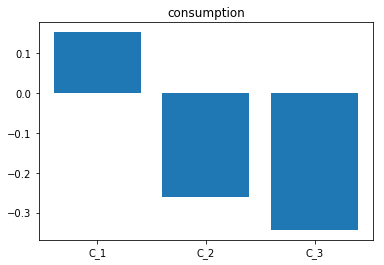

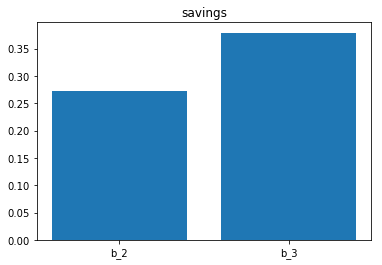

{'C_ss': 1.0188949619075278,
 'EulErr_ss': array([ -5.00000000e+14,   5.00000000e+14]),
 'K_ss': 0.65052056029791483,
 'RCerr_ss': -1.1102230246251565e-16,
 'Y_ss': 1.4362039013386401,
 'b_ss': array([ 0.27160725,  0.37891331]),
 'c_ss': array([ 0.15272572, -0.26182836, -0.34376838]),
 'r_ss': 0.13122171880058442,
 'ss_time': 0.0012494884906573134,
 'w_ss': 0.42433297085005273}

In [61]:
# a and b 
bvec_guess = np.array([.1,.1])
ss_tol = 1e-6
L = nvec.sum()
params = [beta, sigma, nvec, L, A, alpha, delta, ss_tol]
get_SS(params, bvec_guess, True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


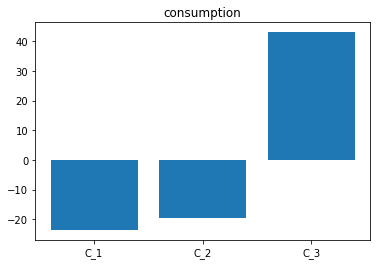

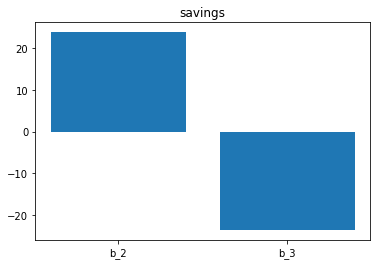

{'C_ss': 0.86285535602934937,
 'EulErr_ss': array([ -2.00155291e+08,   1.00000000e+15]),
 'K_ss': 0.24450278797447211,
 'RCerr_ss': 0.0,
 'Y_ss': 1.0197038945149732,
 'b_ss': array([ 23.87039984, -23.62589706]),
 'c_ss': array([-23.56912369, -19.47356247,  43.01644029]),
 'r_ss': 0.81818218210052951,
 'ss_time': 0.001427540600559496,
 'w_ss': 0.30127615065215113}

In [62]:
# c
bvec_guess = np.array([.1,.1])
ss_tol = 1e-6
L = nvec.sum()
params = [0.55, sigma, nvec, L, A, alpha, delta, ss_tol]
get_SS(params, bvec_guess, True)

#### Exercise 2.3

In [68]:
T = 40
e = 1e-9
bvec_guess = np.array([.1,.1])
nvec = np.array([1,1,.2])
L = nvec.sum()
params = [beta, sigma, nvec, L, A, alpha, delta, e]
guess_ss = get_SS(params, bvec_guess, False)

In [73]:
b2 = 0.8*guess_ss["b_ss"][0]
b3 = 1.1*guess_ss["b_ss"][1]
bvec_guess = np.array([b2,b3])

In [75]:
K = b2+b3
K_guess = guess_ss["b_ss"].sum()
Kgrid = np.linspace(K, K_guess, T)
Kgrid = np.append(Kgrid, K_guess)

In [76]:
Wpath = ((1-alpha)*A/(L**alpha)) * Kgrid**alpha
Rpath = alpha * A * (L/Kgrid)**(1-alpha) - delta

In [83]:
def b32_err(b32, params): 
    rpath, wpath, beta, sigma = params
    error = ((1+rpath[0])*b2 + wpath[0] - b32)**(-sigma) - beta*(1+rpath[1])*((1+rpath[1])*b32 + wpath[1]*0.2)**(-sigma)
    return error
    

def get_b32(rpath, wpath, beta, sigma, b32):
    root =  opt.root(b32_err, b32, np.array([rpath, wpath, beta, sigma]), tol=e)  
    b32_p = root.x
    return b32_p

b32_init = get_b32(Rpath, Wpath, beta, sigma, 0.1)
b32_init

array([ 0.23136226])

In [102]:
def eul_err(bvec_guess, params):
    beta, sigma, w, r = params
    EulErr = np.zeros(2)
    
    c_1 = w[0] - bvec_guess[0]
    c_2 = w[1] - bvec_guess[1] + (1+r[0])*bvec_guess[0]
    c_3 = 0.2*w[2] + (1+r[1])*bvec_guess[1]
    
    if c_1 <= 1e-5:
        U_1 = 1e5
    else:
        U_1 = c_1**(-sigma)
    
    if c_2 <= 1e-5:
        U_2 = 1e5
    else:
        U_2 = c_2**(-sigma)
        
    if c_3 <= 1e-5:
        U_3 = 1e5
    else:
        U_3 = c_3**(-sigma)

    EulErr[0] = beta*(1+r[0])*U_2 - U_1
    EulErr[1] = beta*(1+r[1])*U_3 - U_2
    
    return EulErr

In [124]:
def timepath(bvec_guess, r, w, beta, sigma):
    
    b_mat = np.zeros((len(Kgrid), 2))
    b_mat[0,:] = bvec_guess
    
    for i in range(T):
        root = opt.root(eul_err, bvec_guess, ([beta, sigma, w, r]), tol=e)
        result = root.x
        b_mat[i, 0] = result[0]
        b_mat[i+1, 1] = result[1]
    
    return b_mat

In [125]:
timepath(bvec_guess, Rpath, Wpath, beta, sigma)

array([[ 0.02973101,  0.41680464],
       [ 0.02973101,  0.1432925 ],
       [ 0.02973101,  0.1432925 ],
       [ 0.02973101,  0.1432925 ],
       [ 0.02973101,  0.1432925 ],
       [ 0.02973101,  0.1432925 ],
       [ 0.02973101,  0.1432925 ],
       [ 0.02973101,  0.1432925 ],
       [ 0.02973101,  0.1432925 ],
       [ 0.02973101,  0.1432925 ],
       [ 0.02973101,  0.1432925 ],
       [ 0.02973101,  0.1432925 ],
       [ 0.02973101,  0.1432925 ],
       [ 0.02973101,  0.1432925 ],
       [ 0.02973101,  0.1432925 ],
       [ 0.02973101,  0.1432925 ],
       [ 0.02973101,  0.1432925 ],
       [ 0.02973101,  0.1432925 ],
       [ 0.02973101,  0.1432925 ],
       [ 0.02973101,  0.1432925 ],
       [ 0.02973101,  0.1432925 ],
       [ 0.02973101,  0.1432925 ],
       [ 0.02973101,  0.1432925 ],
       [ 0.02973101,  0.1432925 ],
       [ 0.02973101,  0.1432925 ],
       [ 0.02973101,  0.1432925 ],
       [ 0.02973101,  0.1432925 ],
       [ 0.02973101,  0.1432925 ],
       [ 0.02973101,

In [142]:
b_guess = np.array([0.1, 0.1])
b32_first = get_b32(Rpath, Wpath, beta, sigma, 0.18)

iter = 0
dist = 0.1

R_1 = Rpath.copy()
W_1 = Wpath.copy()
K_1 = Kgrid.copy()
K_prime = Kgrid.copy()

while iter < 300 and dist > e:
    b_mat = timepath(b_guess, R_1, W_1, beta, sigma)
    b32_init = get_b32(R_1, W_1, beta, sigma, 0.1)
    b_mat[0, 1] = b32_init #fill hole at top right
    temp = Kgrid.copy()
    temp = b_mat.sum(axis = 1)
    K_prime[1:T+1] = temp[0:T]
    dist = ((K_prime - K_1)**2).sum()
    K_2 = .2 * K_prime + (1-.2)*K_1

    K_1 = K_2
    W_1 = ((1-alpha)*A/(L**alpha))*K_2**alpha
    R_1 = alpha*A*(L/K_2)**(1-alpha) - delta
    iter += 1

print(iter)
print(dist)
tp,b = K_prime, b_mat

51
8.45602969364e-10


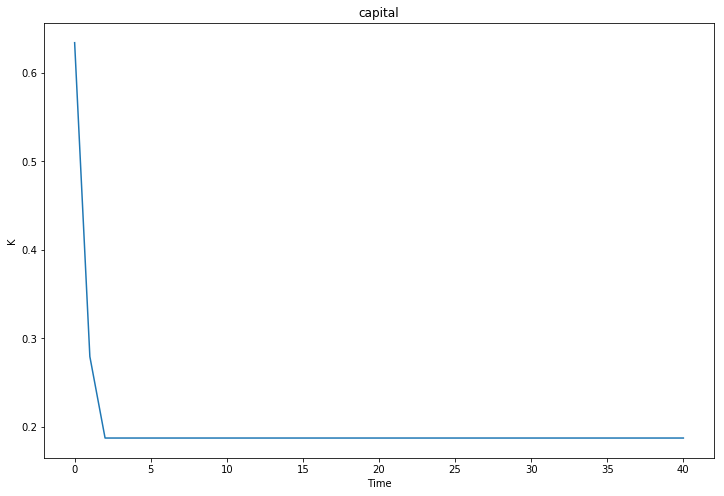

In [145]:
plt.figure(figsize=(12, 8))
plt.plot(tp)
plt.xlabel('Time')
plt.ylabel('K')
plt.title('capital')
plt.show()

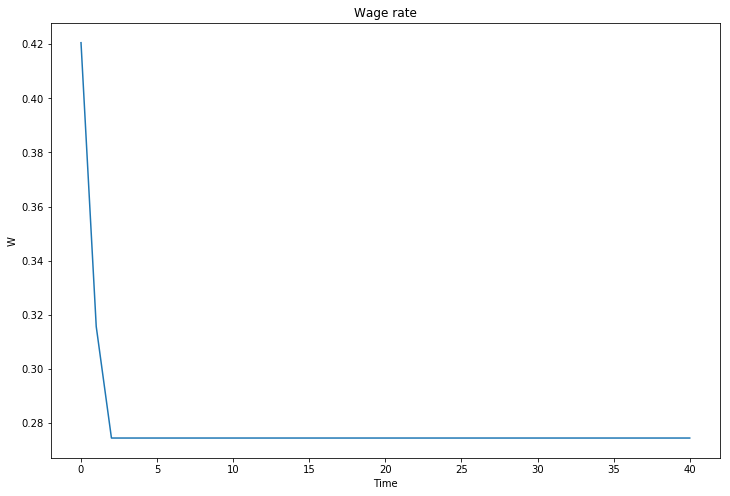

In [146]:
Wpath_fin = ((1-alpha)*A/(L**alpha))*tp**alpha
Rpath_fin = alpha*A*(L/tp)**(1-alpha) - delta

plt.figure(figsize=(12, 8))
plt.plot(Wpath_fin)
plt.xlabel('Time')
plt.ylabel('W')
plt.title('Wage rate')
plt.show()

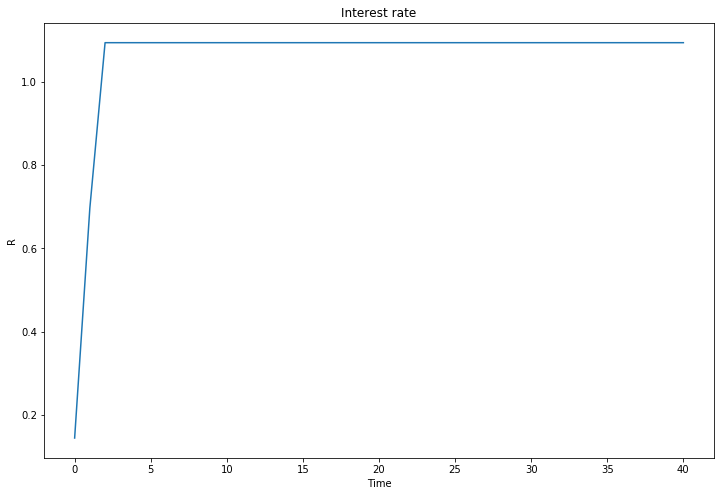

In [147]:
plt.figure(figsize=(12, 8))
plt.plot(Rpath_fin)
plt.xlabel('Time')
plt.ylabel('R')
plt.title('Interest rate')
plt.show()